In [37]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt



In [38]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/Users/ongaga/Downloads/7574f919-8134-4816-9c97-794d60df6171.csv")


In [39]:
# Define a function to clean and split the strings into lists
def clean_and_split(text):
    # Remove leading and trailing square brackets
    text = text.strip('][')
    # Split the string by commas
    items = text.split(', ')
    # Remove single quotes from each item
    items = [item.strip("'") for item in items]
    return items



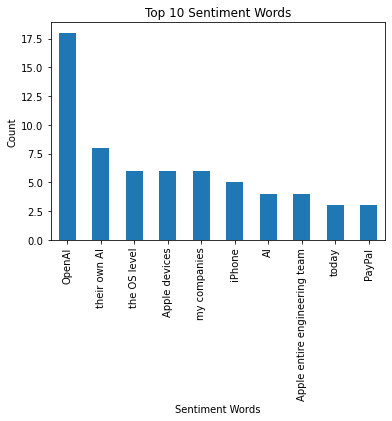

In [40]:
# Apply the function to the 'key_phrases' column
df['key_phrases'] = df['key_phrases'].apply(clean_and_split)

# Flatten the lists in the 'key_phrases' column
all_key_phrases = [phrase for sublist in df['key_phrases'] for phrase in sublist]

# Count the occurrences of each sentiment word
word_counts = pd.Series(Counter(all_key_phrases))

# Drop 'RT' and 'Apple' from the sentiment words
word_counts = word_counts.drop(["RT", "Apple"])

# Select the top 10 sentiment words
top_10_words = word_counts.nlargest(10)

# Plot the bar graph for top 10 sentiment words
top_10_words.plot(kind='bar')
plt.xlabel('Sentiment Words')
plt.ylabel('Count')
plt.title('Top 10 Sentiment Words')
#plt.style("fivethirtyeight")
plt.show()

